Our project is to uncover patterns in music on Spotify between 2010 and 2019. We'll examine musical trends and genres through the years; which artists appeared most frequently, and how beats per minute correlate to dancibility.

What is the most popular genre?

Who is the most popular artist?

Did we see artists make the top ten for various years or just one?

Do beats per minute correlate to ‘dancibility’?

What is the statistical analysis for beats per minute?

Are any of the songs outliers?

Tasks Collect the Data Clean and merge data Explore the data Create Analysis Create the Presentation



In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
import scipy.stats as st
from scipy.stats import iqr
from scipy.stats import linregress


In [2]:
#Import data
music_data_to_load = "top10s.csv"

In [3]:
# Data File and store into Pandas DataFrames
music_data_pd = pd.read_csv(music_data_to_load, sep=',', encoding='latin-1')
music_data_pd.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
music_data_pd["top genre"].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
boy band                      15
barbadian pop                 15
electropop                    13
british soul                  10
big room                      10
neo mellow                     9
canadian contemporary r&b      9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
edm                            5
australian pop                 5
hip hop                        4
permanent wave                 4
latin                          4
tropical house                 3
colombian pop                  3
acoustic pop                   2
electro                        2
canadian hip hop               2
belgian edm                    2
indie pop                      2
escape room                    2
baroque pop                    2
folk-pop                       2
detroit hi

In [5]:
top_genre_df = pd.DataFrame({"total":  music_data_pd["top genre"].value_counts()})
top_genre_df.head()

,total
dance pop,327
pop,60
canadian pop,34
boy band,15
barbadian pop,15


In [6]:
# Determine most popular genre overall 
# top_genre = music_data_pd.groupby(["top genre"])
top_genre_df = pd.DataFrame({"total":  music_data_pd["top genre"].value_counts()})
top_genre_df = top_genre_df.sort_values("total", ascending=False)
top_genre_df
top_genre_df.reset_index(inplace=True)
top_genre_df
top_genre_df.columns = ["genre", "total"]
top_genre_df

,genre,total
0,dance pop,327
1,pop,60
2,canadian pop,34
3,boy band,15
4,barbadian pop,15
5,electropop,13
6,british soul,10
7,big room,10
8,neo mellow,9
9,canadian contemporary r&b,9


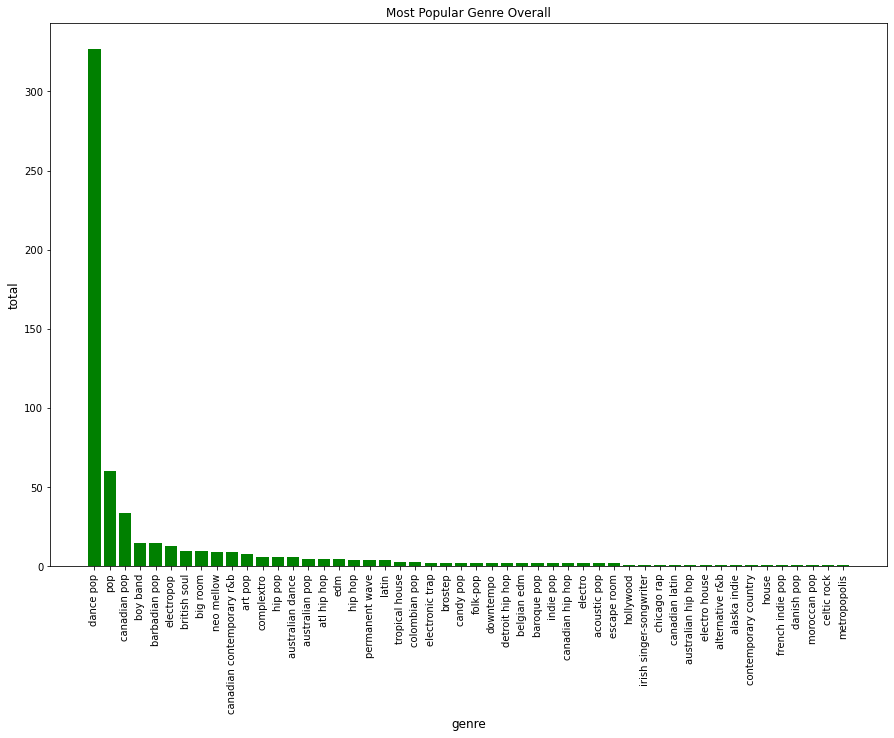

<Figure size 432x288 with 0 Axes>

In [7]:
# Graph popular genre overall
plt.figure(figsize=[15,10])
x_values=top_genre_df['genre']
y_values=top_genre_df['total']

plt.bar(x_values, y_values, color = 'g')
plt.xlabel('genre', fontsize = 12)
plt.xticks(rotation='vertical')

plt.ylabel('total', fontsize = 12)
plt.title('Most Popular Genre Overall')
plt.show()

# save plot as .pngs
plt.savefig("images/Most Popular Genre Overall.png")


In [8]:
# Determine most popular genre by year
top_genre_year_df = music_data_pd.groupby(["year", "top genre"]).count()
top_genre_year_df = top_genre_year_df.sort_values(["year", "Unnamed: 0"], ascending=False)
#top_genre_year_df.head()
clean_by_year_df = top_genre_year_df.drop(['title', 'artist', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
                                           'acous', 'spch', 'pop' ], axis=1)
#clean_by_year_df

cleaner_by_year_df = clean_by_year_df[(clean_by_year_df['Unnamed: 0']>11)]
cleaner_by_year_df.reset_index(inplace=True)
cleaner_by_year_df.columns = ["Year", "Top Genre", "Total"]
cleaner_by_year_df

,Year,Top Genre,Total
0,2018,dance pop,38
1,2017,dance pop,31
2,2016,dance pop,46
3,2015,dance pop,52
4,2014,dance pop,27
5,2013,dance pop,42
6,2012,dance pop,15
7,2011,dance pop,38
8,2010,dance pop,31


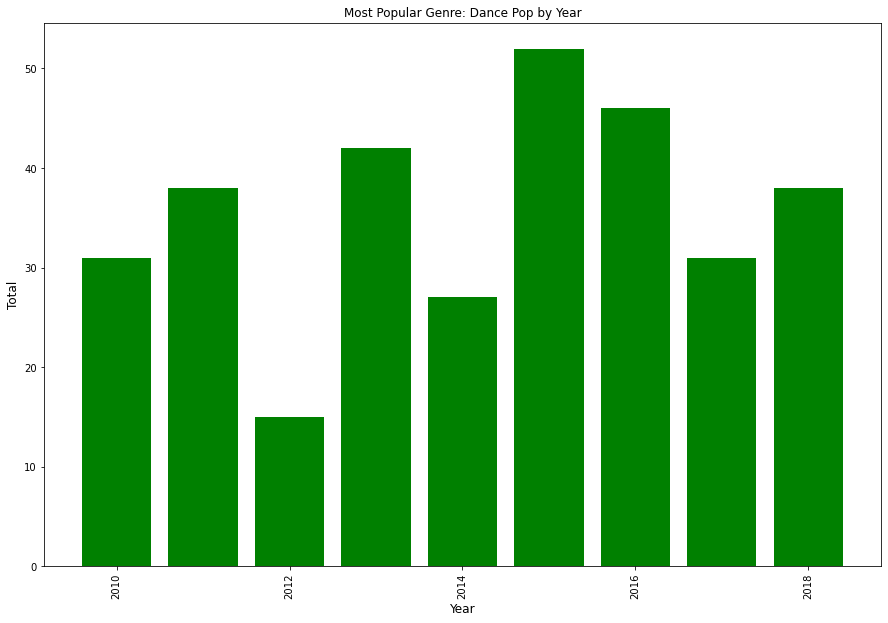

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=[15,10])
x_axis=cleaner_by_year_df['Year']
y_axis=cleaner_by_year_df['Total']

plt.bar(x_axis, y_axis, color = 'g')
plt.xlabel('Year', fontsize = 12)
plt.xticks(rotation='vertical')

plt.ylabel('Total', fontsize = 12)
plt.title('Most Popular Genre: Dance Pop by Year')
plt.show()

# save plot as .pngs
plt.savefig("images/Most Popular Genre Overall.png")


In [10]:
# Most popular artist overall
top_artist_df = pd.DataFrame({"total":  music_data_pd["artist"].value_counts()})
top_artist_df = top_artist_df[(top_artist_df['total']>9)]
top_artist_df = top_artist_df.sort_values("total", ascending=False)
top_artist_df.reset_index(inplace=True)
top_artist_df.columns = ["artist", "total"]
top_artist_df

,artist,total
0,Katy Perry,17
1,Justin Bieber,16
2,Rihanna,15
3,Maroon 5,15
4,Lady Gaga,14
5,Bruno Mars,13
6,The Chainsmokers,11
7,Ed Sheeran,11
8,Pitbull,11
9,Shawn Mendes,11


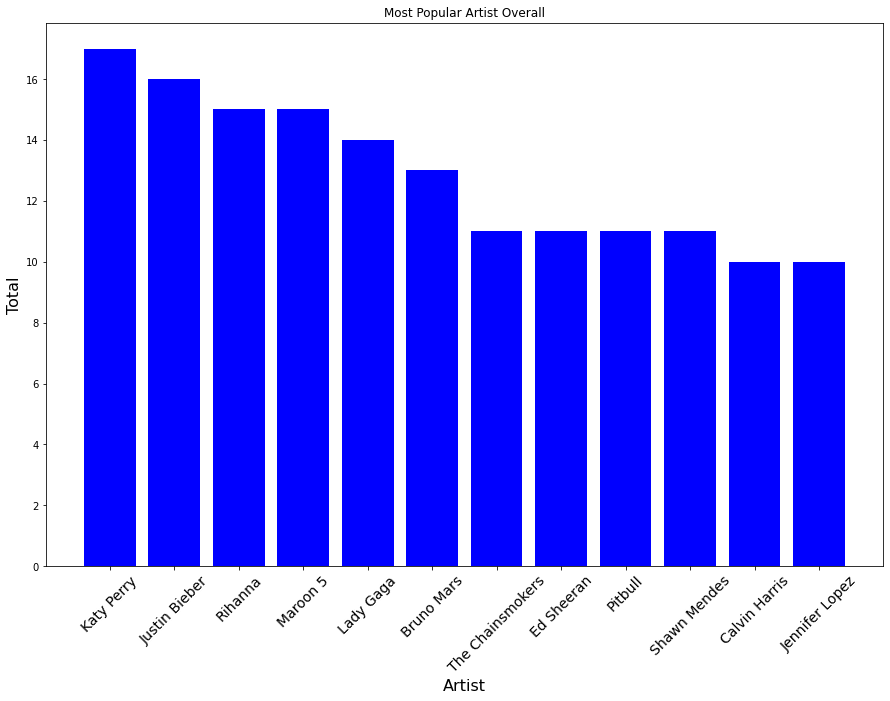

<Figure size 432x288 with 0 Axes>

In [11]:
# Graph most popular artist overall
plt.figure(figsize=[15,10])
x_values=top_artist_df['artist']
y_values=top_artist_df['total']

plt.bar(x_values, y_values, color = 'b')
plt.xlabel('Artist', fontsize = 16)
plt.xticks(rotation='45', fontsize = 14)

plt.ylabel('Total', fontsize = 16)
plt.title('Most Popular Artist Overall')
plt.show()

# save plot as .pngs
plt.savefig("images/Most Popular Artist Overall.png")

In [12]:
# Most popular artist by year
# Determine most popular artist by year
top_artist_year_df = music_data_pd.groupby(["year", "artist"]).count()
top_artist_year_df
top_artist_year_df = top_artist_year_df.sort_values(["year", "Unnamed: 0"], ascending=False)
top_artist_year_df.head()

#clean by year
clart_by_year_df = top_artist_year_df.drop(['title','top genre','bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
                                            'acous', 'spch', 'pop' ], axis=1)
#clart_by_year_df


clart_by_year_df = clart_by_year_df[(clart_by_year_df['Unnamed: 0']>=3)]
#clart_by_year_df
clart_by_year_df.reset_index(inplace=True)
clart_by_year_df.columns = ["Year", "Top Artist", "Total"]
clart_by_year_df





,Year,Top Artist,Total
0,2019,Ed Sheeran,5
1,2019,The Chainsmokers,3
2,2018,Shawn Mendes,4
3,2018,Dua Lipa,3
4,2018,Justin Timberlake,3
5,2018,Taylor Swift,3
6,2017,DNCE,3
7,2017,Katy Perry,3
8,2017,Lana Del Rey,3
9,2017,The Chainsmokers,3


In [13]:
# Calculate the statistical analysis for beats per minute

bpm_df = music_data_pd.drop(['artist','Unnamed: 0', 'year', 'title','top genre', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
                                            'acous', 'spch', 'pop' ], axis=1)

bpm_df

bpm_df.describe()


,bpm
count,602.000000
mean,118.742525
std,24.339497
min,43.000000
25%,100.000000
50%,120.000000
75%,129.000000
max,206.000000


In [14]:
lowerq = 100
upperq = 129
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)



title_list = []
genre_list = []
bpm_list = []

for index, row in music_data_pd.iterrows():

    title = row["title"]
    genre = row["top genre"]
    bpm = row["bpm"]
    
    if (bpm < lower_bound) or (bpm > upper_bound):
        print(f"\"{title}\" in \"{genre}\" genre has bpm {bpm} is an outlier.") 
        title_list.append(title)
        genre_list.append(genre)
        bpm_list.append(bpm)
#         break

"Whataya Want from Me" in "australian pop" genre has bpm 186 is an outlier.
"Hard" in "barbadian pop" genre has bpm 182 is an outlier.
"You Lost Me" in "dance pop" genre has bpm 43 is an outlier.
"Price Tag" in "australian pop" genre has bpm 175 is an outlier.
"We Are Young (feat. Janelle Monáe)" in "baroque pop" genre has bpm 184 is an outlier.
"Roar" in "dance pop" genre has bpm 180 is an outlier.
"Heart Attack" in "dance pop" genre has bpm 174 is an outlier.
"Brave" in "acoustic pop" genre has bpm 185 is an outlier.
"Rock N Roll" in "canadian pop" genre has bpm 184 is an outlier.
"How Ya Doin'? (feat. Missy Elliott)" in "dance pop" genre has bpm 201 is an outlier.
"Partition" in "dance pop" genre has bpm 186 is an outlier.
"Shot Me Down (feat. Skylar Grey) - Radio Edit" in "dance pop" genre has bpm 192 is an outlier.
"Chandelier" in "australian dance" genre has bpm 174 is an outlier.
"FourFiveSeconds" in "barbadian pop" genre has bpm 206 is an outlier.
"Love Me Like You Do - From "F

In [15]:
df = pd.DataFrame({
    "Title": title_list,
    "Genre": genre_list,
    "BPM": bpm_list
})

outliers = df["Title"].count()

print(f"There are {outliers} outliers")

df.head()

There are 27 outliers


,Title,Genre,BPM
0,Whataya Want from Me,australian pop,186
1,Hard,barbadian pop,182
2,You Lost Me,dance pop,43
3,Price Tag,australian pop,175
4,We Are Young (feat. Janelle Monáe),baroque pop,184


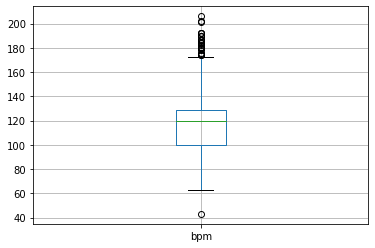

In [16]:
bpm_df.boxplot()
# save plot as .pngs
plt.savefig("images/BPM boxplot.png")


In [17]:
# Do beats per minute correlate to ‘dancibility’? Graph results
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    

The r-squared is : -0.18


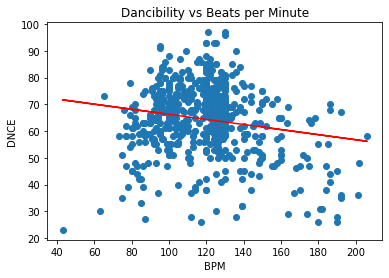

In [18]:
equation = linear_regression(music_data_pd["bpm"], music_data_pd["dnce"])
annotate(equation, 50, 10)
plt.title("Dancibility vs Beats per Minute")
plt.xlabel("BPM")
plt.ylabel("DNCE")
plt.savefig("images/Dancibility vs Beats per Minute.png")
